In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Load the observed light curve data
mjd, flux, err = np.loadtxt('light_curve_GJ1214b.txt', unpack=True)

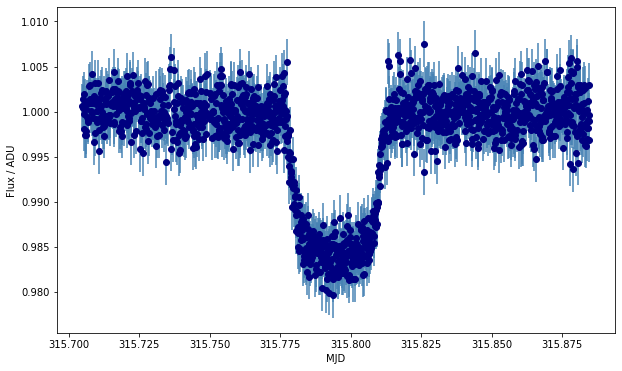

In [2]:
%matplotlib inline

fig = plt.figure(figsize=(10,6))

plt.errorbar(mjd, flux, yerr=err, ecolor='steelblue', linestyle='none', marker='o', color='navy')
plt.xlabel("MJD")
plt.ylabel("Flux / ADU")

plt.savefig("GJ1214b_light_curve.png")

In [3]:
# Estimation of the time of ingress and egress

T1 = 315.7780    # beginning of the transit
T4 = 315.8115    # end of the transit

# We can use these times to calculate a normalization factor from all flux values outside of the transit

norm1 = np.mean(flux[mjd<T1]) # before transit
norm2 = np.mean(flux[mjd>T4]) # after transit
norm = 0.5*(norm1+norm2)

print(f"Flux normalization factor: {norm:.3f}")

# normalize fluxes
flux /= norm
err /= norm


Flux normalization factor: 1.000


In [4]:
# To determine the transit depth we need to find a statistical value of the minimum flux, despite the
# fluctuations in the measurements. A relatively simple method to smooth the light curve is a moving average

# width and offset of sample window
N = 60.
offset = 30 # N/2
width = 2*offset + 1  # N+1

# compute moving average
flux_smoothed = np.ones(flux.size - width + 1)
for i,val in enumerate(flux_smoothed):
    flux_smoothed[i] = np.sum(flux[i:i+width])/width

flux_min = np.min(flux_smoothed)
print(f"Minimum flux: {flux_min:.3f}")

Minimum flux: 0.984


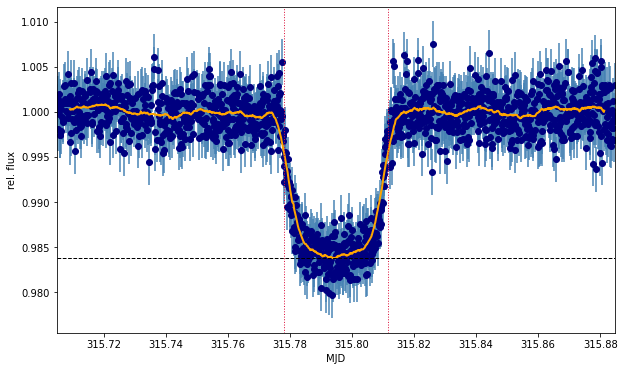

In [5]:
# We will now plot the smoothed light curve over the data plot from before

plt.figure(figsize=(10,6))

plt.errorbar(mjd, flux, yerr=err, ecolor='steelblue',
linestyle='none', marker='o', color='navy', zorder=1)
plt.xlim(np.min(mjd), np.max(mjd))
plt.xlabel("MJD")
plt.ylabel("rel. flux")

# smoothed flux
plt.plot(mjd[offset:-offset], flux_smoothed, lw=2, color='orange', zorder=2)

# ingress, egress, and minimum flux
plt.axvline(T1, color='crimson', lw=1, linestyle=':')
plt.axvline(T4, color='crimson', lw=1, linestyle=':')
plt.axhline(flux_min, lw=1, linestyle='--', color='black')

plt.savefig("GJ1214b_light_curve_smooth.png")

In [6]:
# Relative flux and radius ratio

ratio_flux = 1 - flux_min
display(Math(r"\Delta F / F \approx \ {:.6f}".format(ratio_flux)))

<IPython.core.display.Math object>

In [7]:
# Transit duration

T_trans = T4 - T1  
display(Math(r"Transit\ duration:\ T_{{trans}} = {:.4f}\ day".format(T_trans)))

<IPython.core.display.Math object>

In [8]:
# Orbital period

P = 1.58040433  # in days (reference)
display(Math(r"Orbital\ period:\ P = {:.8f}\ day".format(P)))

<IPython.core.display.Math object>

In [9]:
# Semi-major axis

Ms = 0.178  # Solar mass units (reference)
a = Ms**(1/3)*(P/365.25)**(2/3)
display(Math(r"Semi-major\ axis:\ a = {:.5f}\ AU".format(a)))

<IPython.core.display.Math object>

In [10]:
# Planet radius (with approximation)

Rp = a*((np.pi*T_trans)/P)/(1+np.sqrt(1/ratio_flux))*23454.8   # conversion to Earth radius
display(Math(r"Planet\ radius:\ R_{{P}} = {:.7f} R_{{T}}".format(Rp)))

<IPython.core.display.Math object>

In [15]:
# Radio del planeta (without approximation)

inc = 89
Rp = a*np.sqrt(1-math.sin(math.radians(inc))*math.cos(2*np.pi*T_trans/P))/(1+np.sqrt(1/ratio_flux))*23454.8 # conversion to Earth radius
display(Math(r"Planet\ radius:\ R_{{P}} = {:.7f} R_{{T}}".format(Rp)))

<IPython.core.display.Math object>